# Ejercicio 4
El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos
- A1. Nombre del animal
- A2. Tiene Pelo
- A3. Plumas
- A4. Huevos
- A5. Leche
- A6. Vuela
- A7. Acuático
- A8. Depredador
- A9. Dentado
- A10. Vertebrado
- A11. Branquias
- A12. Venenoso
- A13. Aletas
- A14. Patas
- A15. Cola
- A16. Domestico
- A17. Tamaño gato
- A18. Clase

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

#### a) Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice que tipos de problema podrían surgir al entrenar un modelo para clasificació.

In [17]:
import pandas as pd
import numpy as np
import chardet
from ClassPerceptron import Perceptron
from sklearn import model_selection,preprocessing

def open_file(path):
    # open the path with automatic encoding
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())
    
    return pd.read_csv(path, encoding=encoding['encoding'])
data = open_file("../Datos/zoo.csv")
# data['Clase']
clase_count = data['Clase'].value_counts().to_dict()
clase_count

{'Mamifero': 41,
 'Ave': 20,
 'Pez': 13,
 'Invertebrado': 10,
 'Insecto': 8,
 'Reptil': 5,
 'Anfibio': 4}

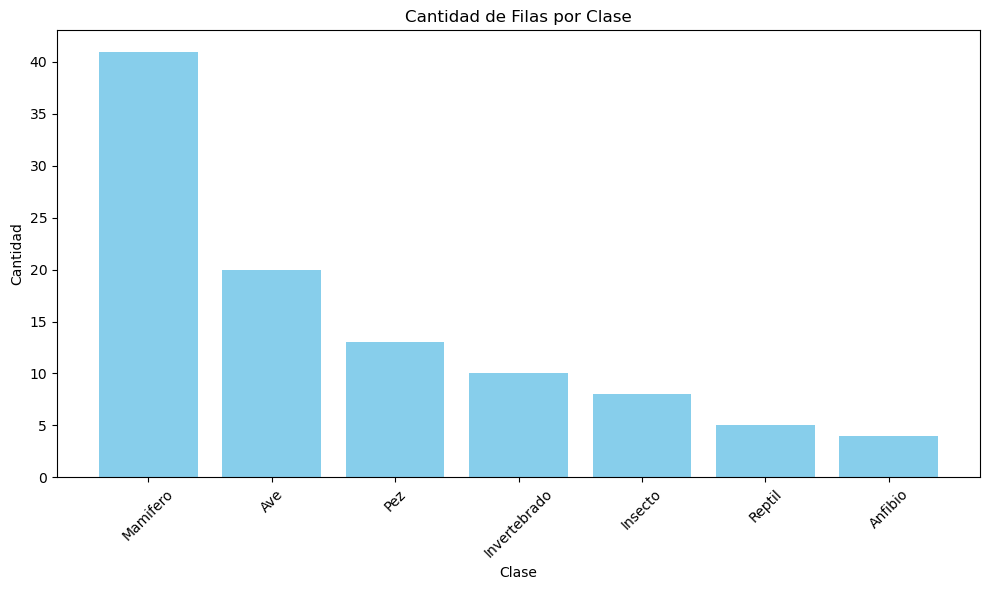

In [18]:
import matplotlib.pyplot as plt

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(list(clase_count.items()), columns=['Clase', 'Cantidad'])

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Clase'], df['Cantidad'], color='skyblue')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Cantidad de Filas por Clase')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### b) Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un mamífero. Entrene varias veces si es necesario y verifique que funciona correctamente.

In [19]:
### VARIABLES
X = np.array(data.iloc[:,1:-1])
max_iteration = 200
alpha = 0.05

In [41]:
def Wb():
    W = np.random.uniform(-0.5, 0.5, size=len(X[0]))
    b = np.random.uniform(-1, 1)
    return W, b
    
def train(X, T, alpha):
    W, b = Wb()
    ppn = Perceptron(alpha=alpha, n_iter=max_iteration, random_state=None)
    ppn.fit(X, T, W, b)
    return ppn

def test(ppn, X, T):

    Y_test = ppn.predict(X)
    nAciertos = sum(Y_test == T)
    return (100*nAciertos/X_test.shape[0])
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
TABLA = [["Clase", "100% de acierto", "Cant de iteraciones "]]

for c in set(data['Clase']):
    T = np.array((data.iloc[:,-1] == c) * 1)
    W = np.random.uniform(-0.5, 0.5, size=len(X[0]))
    b = np.random.uniform(-0.5, 0.5)
    X_train, X_test, T_train, T_test = model_selection.train_test_split(
    X, T, test_size=0.2, random_state=42)
        ### cuestionario
    normalizador= preprocessing.MinMaxScaler()

    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)
    ###
    
    ppn = train(X_train, T_train, alpha) 

    iteraciones = len(ppn.errors_)

    nAciertos = test(ppn, X_test, T_test)
    TABLA.append([c, nAciertos, iteraciones])
    
from tabulate import tabulate
table = tabulate(TABLA, headers="firstrow", tablefmt="grid")
print(table)


+--------------+-------------------+------------------------+
| Clase        |   100% de acierto |   Cant de iteraciones  |
+==============+===================+========================+
| Reptil       |           95.2381 |                      7 |
+--------------+-------------------+------------------------+
| Invertebrado |           95.2381 |                      9 |
+--------------+-------------------+------------------------+
| Mamifero     |          100      |                      6 |
+--------------+-------------------+------------------------+
| Insecto      |          100      |                      5 |
+--------------+-------------------+------------------------+
| Ave          |          100      |                      3 |
+--------------+-------------------+------------------------+
| Pez          |           90.4762 |                      4 |
+--------------+-------------------+------------------------+
| Anfibio      |           90.4762 |                      6 |
+-------

#### c) Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más utilizadas para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y observe si las características más utilizadas siguen siendo las mismas.

In [14]:
def Wb():
    W = np.random.uniform(-0.5, 0.5, size=len(X[0]))
    b = np.random.uniform(-1, 1)
    return W, b
    
def train(X, T, alpha):
    W, b = Wb()
    ppn = Perceptron(alpha=alpha, n_iter=max_iteration, random_state=None)
    ppn.fit(X, T, W, b)
    return ppn

def test(ppn, X, T):

    Y_test = ppn.predict(X)
    nAciertos = sum(Y_test == T)
    return (100*nAciertos/X_test.shape[0])
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
TABLA = [["Clase", "100% de acierto", "Cant de iteraciones "]]

for c in ['Mamifero', 'Ave', 'Reptil']:
    T = np.array((data.iloc[:,-1] == c) * 1)
    W = np.random.uniform(-0.5, 0.5, size=len(X[0]))
    b = np.random.uniform(-0.5, 0.5)
    

    
    X_train, X_test, T_train, T_test = model_selection.train_test_split(
    X, T, test_size=0.30, random_state=42)
    ppn = train(X_train, T_train, alpha) 
    titulos = data.columns[1:]
    mi_dict ={}
    for key,value in zip(titulos, ppn.w_):
        mi_dict[key]=value

    print(c)
    print(mi_dict)

Mamifero
{'Tiene_Pelo': 0.17488063676394774, 'Tiene_Plumas': -0.05473505278607599, 'Nace_de_huevo': -0.6029481772486712, 'Toma_Leche': 0.19602841249655245, 'Vuela': -0.041258028991462456, 'Acuatico': -0.17035060030200722, 'Depredador': 0.14196645477291941, 'Dentado': 0.20410528229188124, 'Vertebrado': 0.13704981786118767, 'Respira': 0.07389009721012563, 'Venenoso': -0.28063391683513206, 'Tiene_Aletas': 0.13146090419561107, 'Cant_Patas': 0.08022179380565717, 'Tiene_Cola': 0.37672440501797755, 'Domestico': 0.12049667802149147, 'Tamano_Gato': 0.2054395478993738}
Ave
{'Tiene_Pelo': -0.23835687686046686, 'Tiene_Plumas': 0.4475217192172031, 'Nace_de_huevo': -0.10939497266430946, 'Toma_Leche': 0.1162251906180644, 'Vuela': 0.43968298510876797, 'Acuatico': 0.3374250379352732, 'Depredador': 0.131522953123759, 'Dentado': -0.2354071091311229, 'Vertebrado': 0.056838970403804256, 'Respira': 0.34106872029038626, 'Venenoso': -0.30967931682095007, 'Tiene_Aletas': -0.2918964700807952, 'Cant_Patas': -0.0

#### d) Repita b) y c) para las aves.


#### e) Repita b) y c) para los reptiles